In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

print("Libraries Imported")

Libraries Imported


In [2]:
data = pd.read_csv('/kaggle/input/cicddos-dataset/cicddos2019_dataset.csv')

rows = data.sample(n=int(0.05 * len(data)))

sample_size = math.ceil(0.05 * len(data))
rows = data.sample(n=sample_size)

print(f"Data shape: {len(data)} | Sample shape: {len(rows)}")

# Separate features, labels, and classes
labels = rows['Label'].values       # 18 unique labels
classes = rows['Class'].values      # 2 unique classes
features = rows.drop(columns=['Label', 'Class'])

print("Features shape:", features.shape)
print("Unique labels:", len(np.unique(labels)))
print("Unique classes:", np.unique(classes))

Data shape: 431371 | Sample shape: 21569
Features shape: (21569, 78)
Unique labels: 18
Unique classes: ['Attack' 'Benign']


In [3]:
print(rows.dtypes)
print(rows.head())

Unnamed: 0                  int64
Protocol                    int64
Flow Duration               int64
Total Fwd Packets           int64
Total Backward Packets      int64
                           ...   
Idle Std                  float64
Idle Max                  float64
Idle Min                  float64
Label                      object
Class                      object
Length: 80, dtype: object
        Unnamed: 0  Protocol  Flow Duration  Total Fwd Packets  \
29826        29826         6            124                  2   
172648       47478         6          54863                  1   
253447      128277        17        3001210                  4   
34657        34657         6       42516714                  6   
16384        16384         6       50516211                 24   

        Total Backward Packets  Fwd Packets Length Total  \
29826                        2                      12.0   
172648                       2                       0.0   
253447                 

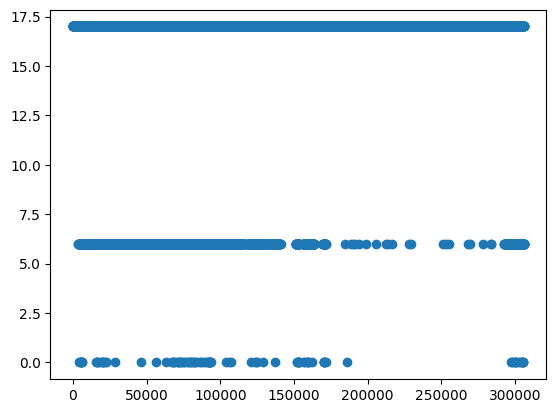

In [4]:
plt.scatter(rows.iloc[: , 0], rows.iloc[: , 1])

In [5]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
data_2d = tsne.fit_transform(features)
print("Complete")

Complete


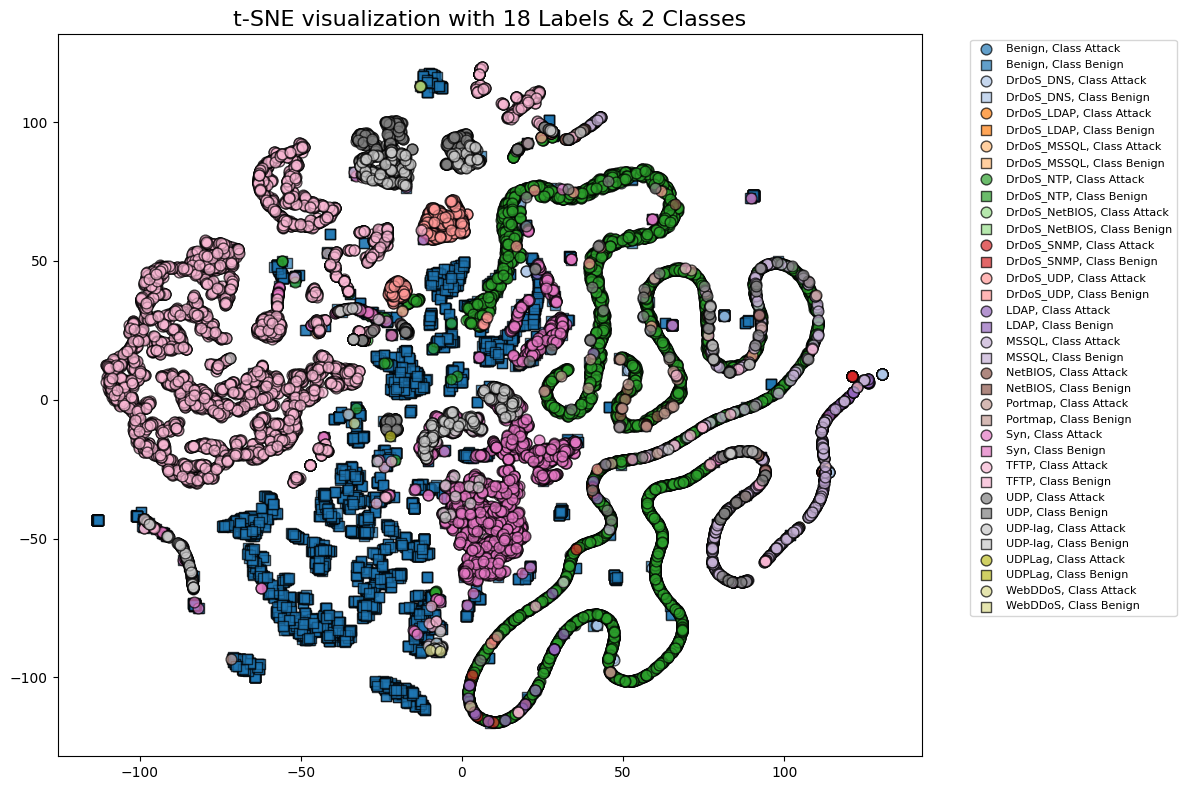

In [6]:
# Plotting
unique_labels = np.unique(labels)
unique_classes = np.unique(classes)

palette = sns.color_palette("tab20", len(unique_labels))  # 18 colors
markers = ['o', 's']  # 2 markers for classes

plt.figure(figsize=(12, 8))

for i, label in enumerate(unique_labels):
    for j, cls in enumerate(unique_classes):
        mask = (labels == label) & (classes == cls)
        plt.scatter(
            data_2d[mask, 0],
            data_2d[mask, 1],
            c=[palette[i]],
            marker=markers[j],
            label=f"{label}, Class {cls}",
            alpha=0.7,
            edgecolor="k",
            s=60
        )

plt.title("t-SNE visualization with 18 Labels & 2 Classes", fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()